In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt

import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

'en_US.UTF-8'

In [17]:
df_rnn = pd.read_csv("output_wfss_rnn.csv")
df_var = pd.read_csv("../muia-tfm-var/output.var.20170407-171800.csv")
df_market_price = pd.read_csv("market_price.csv")

In [18]:
var_mae = np.empty(2673)
var_mae[:] = 8.574107
var_mae
df_var_mae = pd.DataFrame(var_mae, columns = ['VAR_MAE'])

In [19]:
rnn_mae = np.empty(2673)
rnn_mae [:] = 5.40873695212
df_rnn_mae = pd.DataFrame(rnn_mae, columns = ['RNN_MAE'])


In [20]:
# Diff graph for MarketPrice.
# This plot shows the values for the two models MAE and the
# fluctuation of the BTC price from day to day.
df_diff = abs(df_market_price - df_market_price.shift(1))
df_diff.MarketPrice[0] = 0
df_diff.insert(loc = 0, column = 'VAR_MAE', value = df_var_mae.VAR_MAE)
df_diff.insert(loc = 0, column = 'RNN_MAE', value = df_rnn_mae.RNN_MAE)
df_diff.columns = ['RNN-MAE', 'VAR-MAE', 'MarketPrice Diff(1)']
font = { 'family' : 'normal',
         'weight' : 'normal',
         'size' : 15 }
matplotlib.rc('font', **font)
df_diff.index = pd.date_range(start = '2009-01-03', end = '2016-04-28')
# df_diff.plot(figsize = (30,16))

In [21]:
df_diff.columns

Index([u'RNN-MAE', u'VAR-MAE', u'MarketPrice Diff(1)'], dtype='object')

In [22]:
# VAR Error Visualization
df_error_var = pd.DataFrame(abs(df_market_price.MarketPrice - df_var['VAR-Prediction']))
df_error_var.insert(loc = 0, column = 'VAR-MAE', value = df_var_mae.VAR_MAE)
df_error_var.columns = ['VAR-MAE', 'VAR-Absolute-Error']
df_error_var.index = pd.date_range(start = '2009-01-03', end = '2016-04-28')
# df_error_var.plot(figsize = (30,16), fontsize = 20)

In [23]:
# RNN Error Visualization
df_error_rnn = pd.DataFrame(abs(df_market_price.MarketPrice - df_rnn['RNN-Prediction']))
df_error_rnn.insert(loc = 0, column = 'RNN-MAE', value = df_rnn_mae.RNN_MAE)
df_error_rnn.columns = ['RNN-MAE', 'RNN-Absolute-Error']
df_error_rnn.index = pd.date_range(start = '2009-01-03', end = '2016-04-28')
# df_error_rnn.plot(figsize = (30,16))

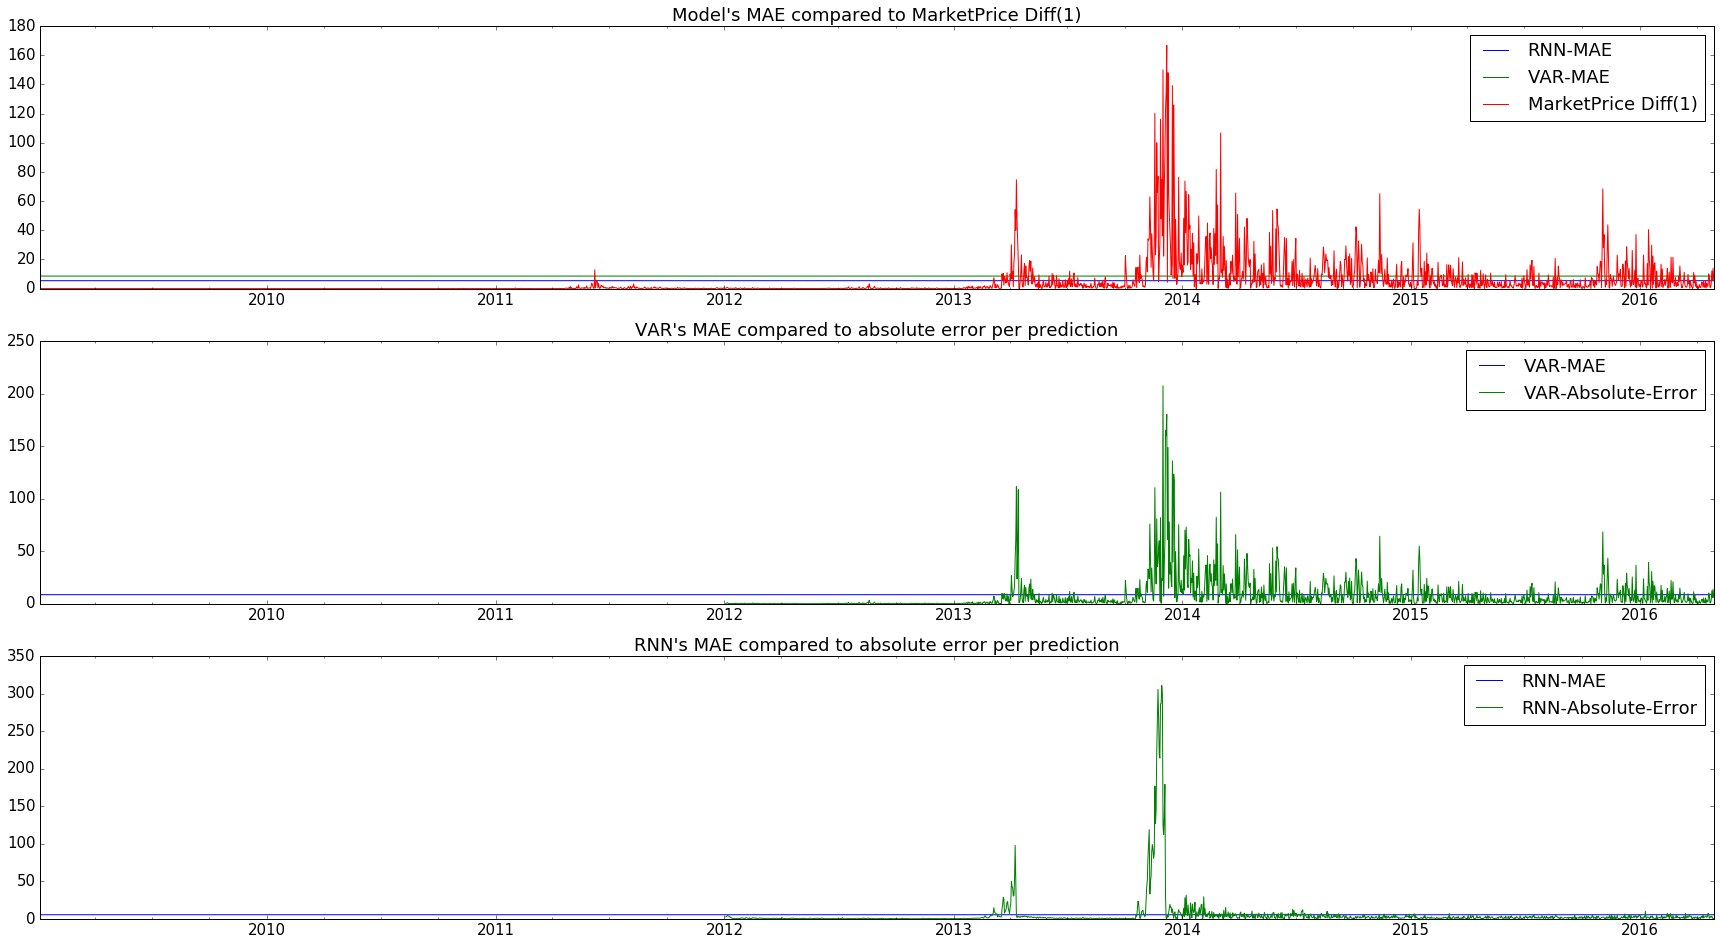

In [24]:
fig, axes = plt.subplots(nrows = 3, figsize = (30, 16))

# 1
df_diff.plot(ax = axes[0], title = "Model's MAE compared to MarketPrice Diff(1)")
df_error_var.plot(ax = axes[1], title = "VAR's MAE compared to absolute error per prediction")
df_error_rnn.plot(ax = axes[2], title = "RNN's MAE compared to absolute error per prediction")


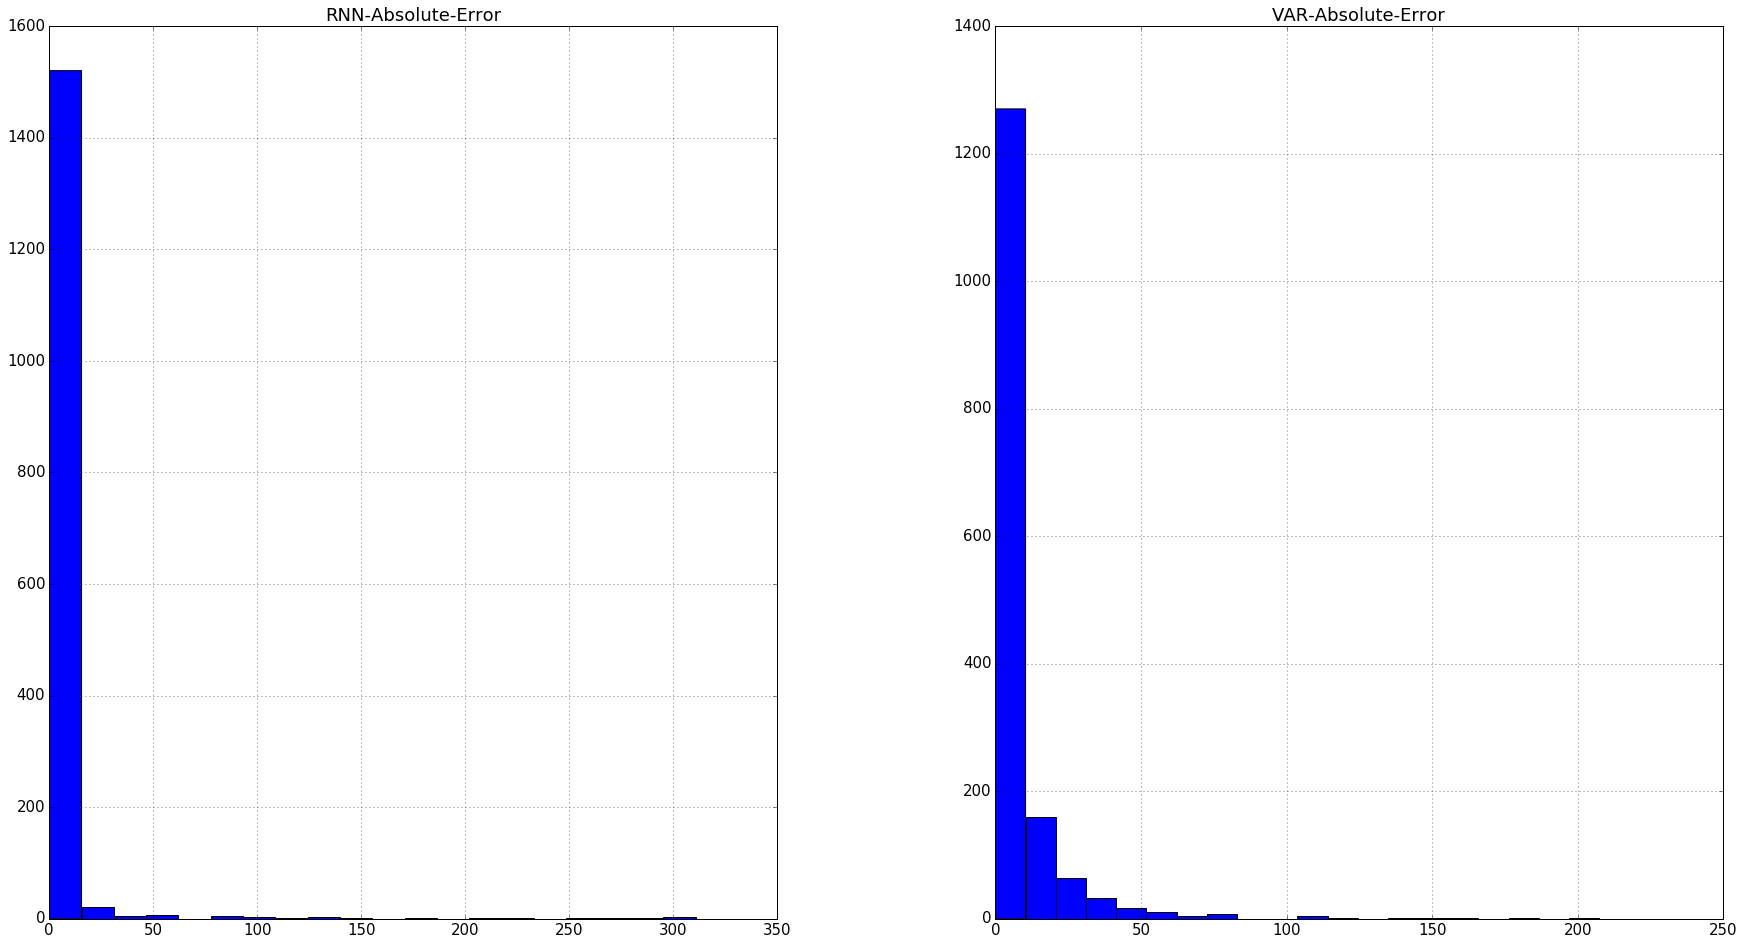

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21c3f71890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f21c1f16b50>]], dtype=object)

In [25]:
df_errors = df_error_var
df_errors.insert(loc = 0, column = 'RNN-Absolute-Error', value = df_error_rnn['RNN-Absolute-Error'])
df_errors.columns
df_errors[['RNN-Absolute-Error', 'VAR-Absolute-Error']].hist(figsize = (30,16), bins = 20, stacked = True)

In [26]:
df_errors2 = df_errors
df_errors2[1095:].describe()

       RNN-Absolute-Error       VAR-MAE  VAR-Absolute-Error
count         1578.000000  1.578000e+03         1578.000000
mean             5.408737  8.574107e+00            7.620048
std             24.691927  2.381073e-13           16.361756
min              0.002354  8.574107e+00            0.000126
25%              0.410504  8.574107e+00            0.299130
50%              1.116599  8.574107e+00            2.064831
75%              2.955293  8.574107e+00            7.813567
max            310.874060  8.574107e+00          207.425897